# ML Tutorial
1. Closed form solution - derivation and code
2. Gradient Descent method
3. Model underfitting & overfitting
4. Bias-Variance Tradeoff

In [1]:
#importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Generate random dataset

#Setting the seed to a specific value, ensures production of same sequence of numbers, making the results reproducible
np.random.seed(0)

#np.random.rand -> 80x1 vector of values lying between 0 and 1
#effectively generate 80 values lying between 0 and 5 sorted in the ascending order
X = np.sort(5 * np.random.rand(80, 1), axis=0)

#.ravel() to flatten the 2D array to 1D
#generating nos from a normal distribution with mean 0 and std 0.1
#X.shape[0] i.e 80 such values to be generated
Y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Add noise to training data
noise = np.random.normal(0, 0.1, X.shape[0])
Y_noisy = Y + noise

In [3]:
# Split the data into training and testing sets
#random state again to ensure that the same train test split occurs every time the code is run
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_noisy, test_size=0.2, random_state=0)

In [4]:
# Data Preprocessing - Standardization

#create an instance of the standardscaler class
scaler = StandardScaler()

#fit transform computes mean and std from training data and standardizes it
# variance = (summation(x - mu)^2/N), std = sqrt(variance)
X_train_scaled = scaler.fit_transform(X_train)

#using the same mean and std to standardize test data
#assuming it's from the same distribution
X_test_scaled = scaler.transform(X_test)

In [5]:
# Sort the data points for plotting

#np.argsort() takes 1D arrays
#returns indices that sort X_train in ascending order
sorted_indices = np.argsort(X_train.flatten())

#X_train is sorted as per the indices
#Y_train is also sorted as per the same indices, so that X-Y values align
X_train_sorted = X_train[sorted_indices]
Y_train_sorted = Y_train[sorted_indices]

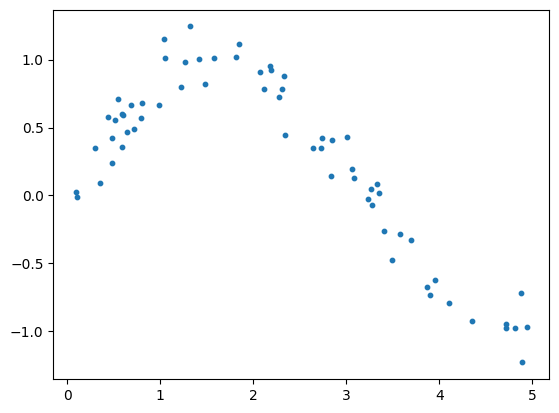

In [6]:
#creating a scatter plot
plt.scatter(X_train_sorted, Y_train_sorted, s = 10)

In [7]:
#most ML algos and lib require 2D arrays

#-1 to tell numpy to compute this dimension based on the other one
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)

# LINEAR REGRESSION

### Closed Form

In [10]:
#addition of column of ones - np.ones(n,1) creates a column of nx1 filled with 1's
#np.c_ does column stacking, adds this column to the right of the matrix
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [11]:
def closedForm(X, Y):

    #Implementing the closed form expression as mentioned above
    #matrix pseudo inverse
    parameter_vector = np.linalg.pinv(X.T @ X) @ (X.T @ Y)

    # Getting the predictions from training data
    #np.dot() computes the dot product of the 2 vectors
    Y_prediction = np.dot(X, parameter_vector)

    # Computing the Mean Squared Error
    Mean_Squared_Error = ((Y - Y_prediction).T @ (Y - Y_prediction)) / len(X)

    print("MSE Closed form: " + str(Mean_Squared_Error[0][0]))

    return parameter_vector

parameters = closedForm(X_train_with_bias, Y_train)

MSE Closed form: 0.18158772440472715


In [12]:
#testing closed form
Y_test_linear_predictions = np.dot(X_test_with_bias, parameters)
print("Closed Form Linear Regression Testing Error: "+str(mean_squared_error(Y_test_linear_predictions, Y_test)))

Closed Form Linear Regression Testing Error: 0.20148708496101592


### Gradient Descent

In [13]:
def gradientDescent(learning_rate, number_of_epochs, X, Y):

  number_of_samples = len(X)

  a = np.random.uniform(-30, 30)
  b = np.random.uniform(-30, 30)

  mse_values = []

  for epoch in range(number_of_epochs):

    Y_minus_ax_plus_b = Y - ((a*X) + b)

    gradient_wrt_a = (-2)*(Y_minus_ax_plus_b.T @ X)/(number_of_samples)
    a = a - ((learning_rate)*(gradient_wrt_a))

    gradient_wrt_b = (-2)*np.sum(Y_minus_ax_plus_b.T)/(number_of_samples)
    b = b - ((learning_rate)*(gradient_wrt_b))

    Y_train_predictions_vector = (a*X) + b
    currentMSE = np.sum((Y - Y_train_predictions_vector)**2) / number_of_samples

    mse_values.append(currentMSE)

  #final training prediction obtained by ax+b where a,b are the parameters obtained after gradient descent
  Y_train_predictions_vector = (a*X) + b

  #calculating the training MSE
  Univariate_train_MSE = (Y - Y_train_predictions_vector).T @ (Y - Y_train_predictions_vector)/len(X)

  print("MSE: "+str(Univariate_train_MSE[0][0]))

  return (np.array(mse_values), a, b)

In [14]:
(mse_values, a, b) = gradientDescent(0.1, 100, X_train, Y_train)

MSE: 0.18486665653479895


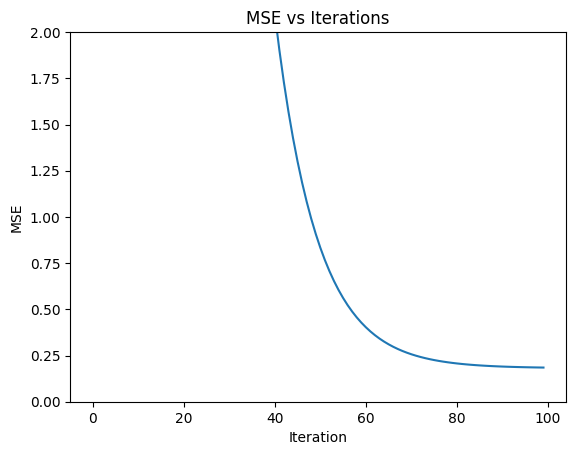

In [15]:
#x values in the range 0 to 99, and corresponding y values being the MSE values
plt.plot(range(100), mse_values)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.show()

### SKLearn's Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#creating an instance of LinearRegression class
linear_regression_model = LinearRegression()

#here training occurs
linear_regression_model.fit(X_train, Y_train)

#now we have a trained linear_regression_model

LinearRegression()

In [17]:
Y_train_linear_predictions = linear_regression_model.predict(X_train)
print("SKLearn's Linear Regression Training Error: " + str(mean_squared_error(Y_train, Y_train_linear_predictions)))

SKLearn's Linear Regression Training Error: 0.18158772440472715


In [18]:
#to test the model:
Y_test_linear_predictions = linear_regression_model.predict(X_test)
print("SKLearn's Linear Regression Testing Error: " + str(mean_squared_error(Y_test, Y_test_linear_predictions)))

SKLearn's Linear Regression Testing Error: 0.20148708496101608


### POLYNOMIAL REGRESSION

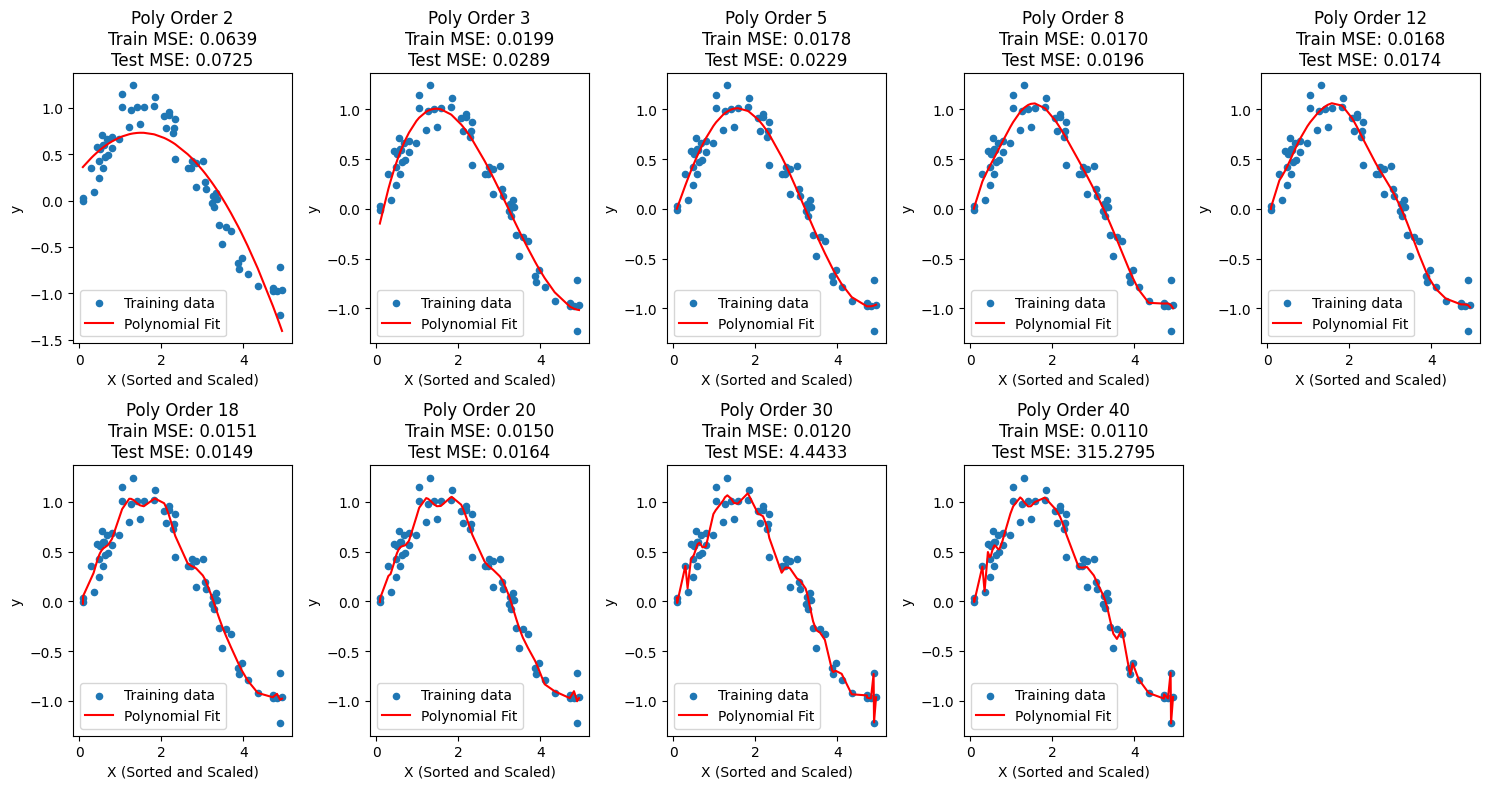

In [19]:
# Polynomial Regression - Different Orders
orders = [2, 3, 5, 8, 12, 18, 20, 30, 40]

#for storing the training and testing errors for each polynomial order
train_errors = []
test_errors = []

#number of rows and columns for the subplot grid
num_rows = 2
num_cols = 5

#creating the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, order in enumerate(orders):

    #to get the row and col number of the subplot
    row = i // num_cols
    col = i % num_cols

    #create and instance of polynomialfeatures with the specified degree
    poly_features = PolynomialFeatures(degree=order)

    X_poly_train = poly_features.fit_transform(X_train_scaled)

    X_poly_test = poly_features.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, Y_train)
    poly_pred_train = poly_model.predict(X_poly_train)
    poly_pred_test = poly_model.predict(X_poly_test)

    train_mse = mean_squared_error(Y_train, poly_pred_train)
    test_mse = mean_squared_error(Y_test, poly_pred_test)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    ax = axes[row, col]
    ax.scatter(X_train_sorted, Y_train_sorted, s=20, label="Training data")
    ax.plot(X_train_sorted, poly_pred_train[sorted_indices], color='red', label="Polynomial Fit")
    ax.set_title(f"Poly Order {order}\nTrain MSE: {train_mse:.4f}\nTest MSE: {test_mse:.4f}")
    ax.set_xlabel("X (Sorted and Scaled)")
    ax.set_ylabel("y")
    ax.legend()

# Hide any empty subplots
for i in range(len(orders), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

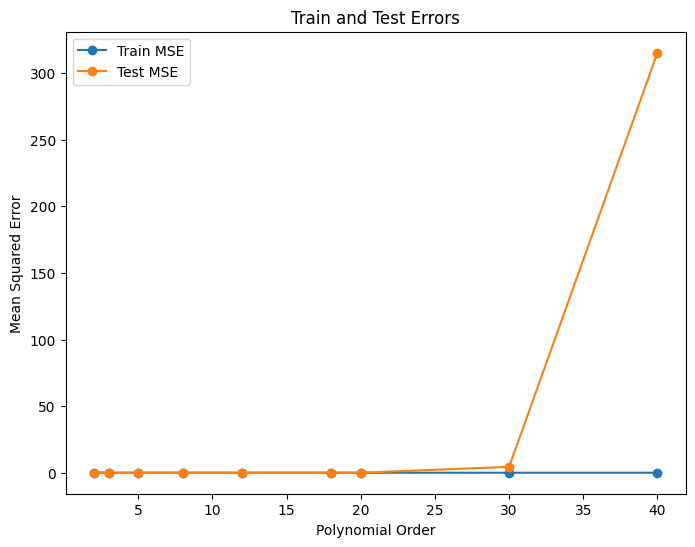

In [20]:
# Plot Train and Test Errors
plt.figure(figsize=(8, 6))
plt.plot(orders, train_errors, marker='o', label='Train MSE')
plt.plot(orders, test_errors, marker='o', label='Test MSE')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors')
plt.legend()
plt.show()

Good resource for understanding overfitting and underfitting: https://www.steveklosterman.com/over-under/

This notebook is made referring to last year's TA session